# 기계학습 및 실습 2024 2학기 중간과제

## 타이타닉 데이터셋 분석

인공지능융합학부 김광현 2020101008

In [911]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import shuffle

## 데이터 분석 목표
- 각 데이터 별로 생존률에 영향을 준 요소에 대해 분석
- 데이터들간 상관관계 확인

## 데이터 불러오기

### 데이터 설명

- Survived: 0 = 사망, 1 = 생존
- Pclass: 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex: male = 남성, female = 여성
- Age: 나이
- SibSp: 배에 탑승한 형제/자매의 수
- Parch: 배에 탑승한 부모/자식의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지 C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [912]:
df = pd.read_csv("data/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [913]:
test = pd.read_csv("data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1. 생존자 비율

In [914]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: title={'center': 'Survived'}, ylabel='count'>

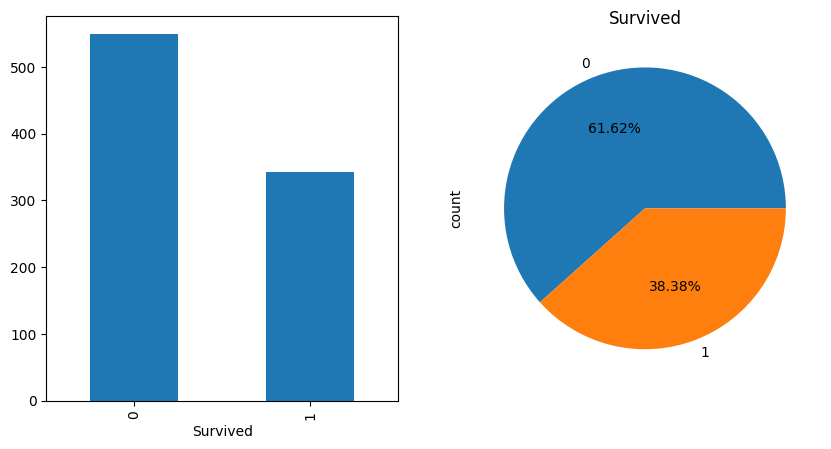

In [915]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df["Survived"].value_counts().plot(kind='bar')
plt.subplot(1, 2, 2)
df["Survived"].value_counts().plot(title='Survived', kind='pie', autopct='%1.2f%%')

사망 비율은 생존자 38.38%, 사망자 61.62%로 타이타닉 호에서 생존자보다 사망자가 더 많다는 사실을 알 수 있다.

### 2. 성별 분포와 성별에 따른 생존자 분포

<Axes: xlabel='Sex', ylabel='count'>

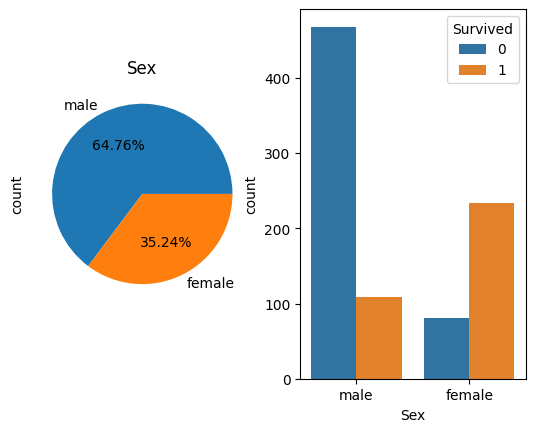

In [916]:
plt.subplot(1, 2, 1)
df["Sex"].value_counts().plot(title='Sex', kind='pie', autopct='%.2f%%')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Sex", hue="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


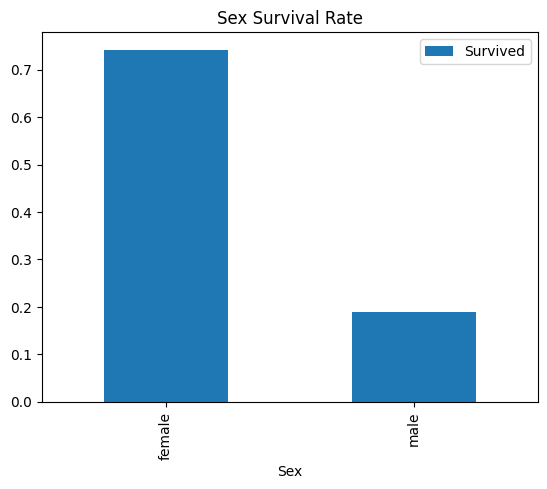

In [917]:
ss = df[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()
ss.set_title("Sex Survival Rate")
df[['Sex', 'Survived']].groupby('Sex').mean()

타이타닉 호에 탑승한 남성은 전체 64.76%, 여성은 35.24% 이다. 그 중에서 생존자 비율은 여성 74.20%, 남성 18.89% 이다. 여성 탑승자는 다수 생존한 반면, 남성 탑승자는 대부분이 사망한 것을 볼 수 있다. 

### 3. 티켓 클래스별 생존자

In [918]:
pcls = df[['Pclass', 'Survived']].groupby('Pclass').mean()
pcls

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

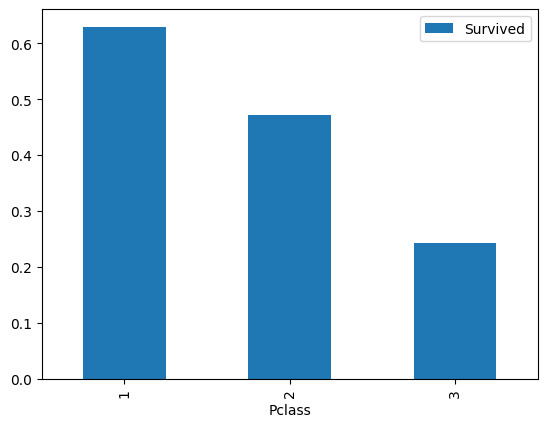

In [919]:
pcls.plot.bar()

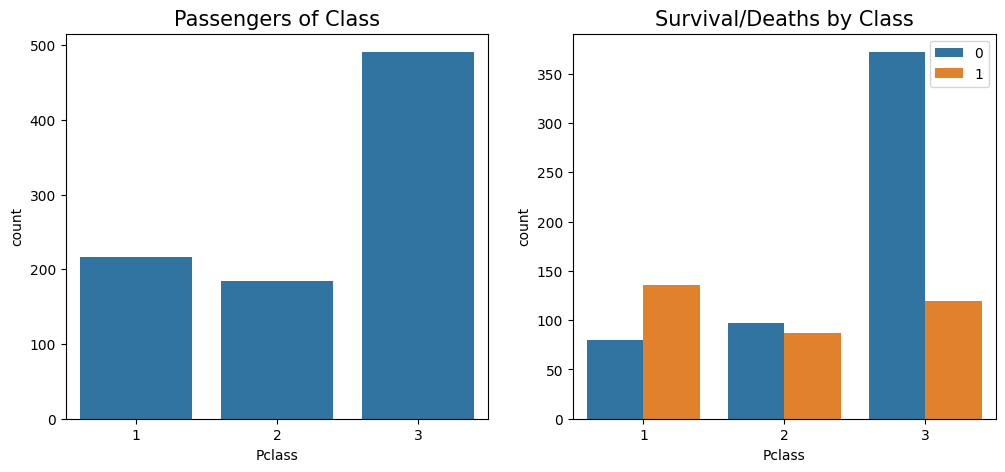

In [920]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("Passengers of Class", size=15)
sns.countplot(data=df, x='Pclass', ax=axes[0])

axes[1].set_title("Survival/Deaths by Class", size=15)
sns.countplot(x="Pclass", hue="Survived", data=df, ax=axes[1])
axes[1].legend(labels = ['0', '1'])

티켓 클래스별 생존자 비율은 1등석은 1등석 승객중 63%, 2등석 승객은 47.3%, 3등석 승객은 24.2% 이다.
오른쪽 그래프를 보면 1등석 승객은 생존자가 사망자보다 많고, 2등석 승객은 생존자가 사망자보다 약간 적다. 하지만 3등석 승객은 사망자의 비율이 생존자보다 월등히 많은 것을 볼수 있다.

### 결측치 처리

나이에 대한 상관관계를 찾기 전에 이 데이터셋의 결측치를 확인해보도록 하자

In [921]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [922]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age의 결측치가 177개(전체 19.86%), Cabin은 687개(전체 77.10%), Embarked는 2개(전체 0.22%) 결측치가 측정이 된 것을 확인할 수 있다

In [923]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age 칼럼의 결측치는 Age 칼럼의 평균값으로 처리

In [924]:
df = df.drop(columns='Cabin')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Cabin 칼럼은 결측치가 너무 많고(77.1%), 특별한 정보를 얻을 수 없다 판단해서 열을 삭제

In [925]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [926]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Embarked의 값이 null인 데이터 조회

In [927]:
emn = df[df['Embarked'].isnull()]
emn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [928]:
df[['Embarked']].mode()

,Embarked
0,S


최빈값 S로 null값 대체

In [929]:
df['Embarked'] = df['Embarked'].fillna('S')

In [930]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

이제 모든 결측치가 처리된 것을 볼수있다.

### 4. 나이와 생존자의 상관관계

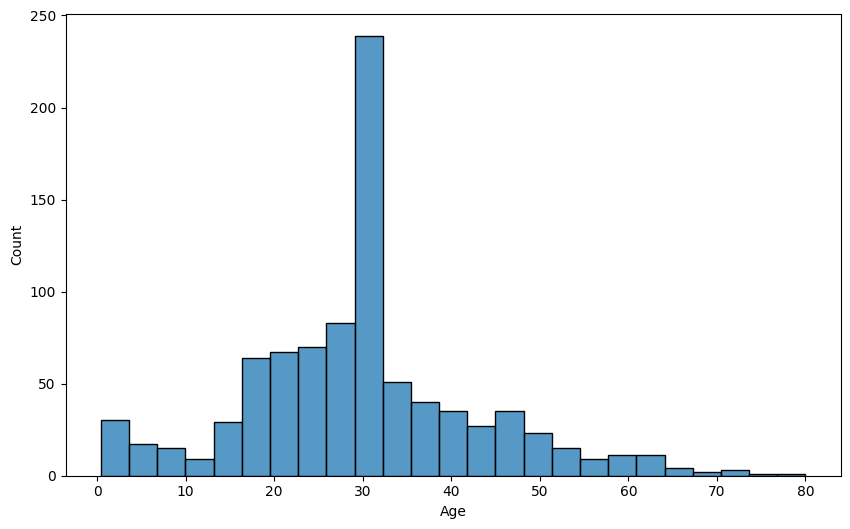

In [931]:
fig, ax = plt.subplots(figsize=(10,6))
 
sns.histplot(df['Age'], bins=25, ax=ax)
 
plt.show()

이 그래프를 보면 20~40세 사이의 연령이 많이 탑승한 것으로 나타난다.

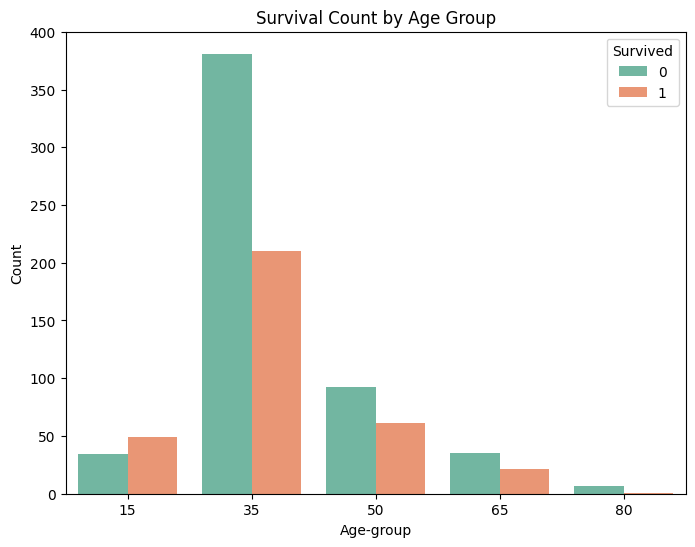

In [932]:
bins = [0, 15, 35, 50, 65, 80]  
labels = [15, 35, 50, 65, 80] 
df['Age-group'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age-group', hue='Survived', palette='Set2')

plt.title('Survival Count by Age Group')
plt.xlabel('Age-group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['0', '1'])
plt.show()


여기서 x축의 숫자는 각각 0~15, 16~35, 36~50, 51~65, 66~80 사이의 나이 범주를 나타낸 것이다. 15세까지의 승객은 탑승자 중 생존자의 비율이 더 많고, 16~35세의 승객은 사망자의 비율이 더 많다. 36~50세, 51~65세, 66~80세의 승객 전부 사망자의 비율이 더 높게 나온 것을 볼 수 있다. 

사망자도 역시 20~40대의 연령이 제일 많은 것을 볼 수 있다.

### 5. 함께 탑승한 가족의 수와 생존자의 상관관계

우선 형제자매와 함께 탄 탑승자 숫자별 통계를 보면

In [933]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

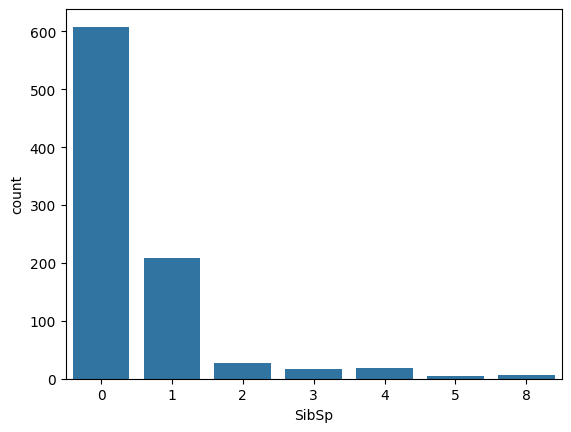

In [934]:
sns.countplot(data=df, x='SibSp')


이 그래프를 통해 같이 동승한 형제자매가 없는 승객이 제일 많다는 것을 알 수 있다. 

In [935]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


이 통계는 동승자(형제자매)숫자 별 생존률을 나타낸다. 동승한 형제자매가 1명인 승객이 생존률이 제일 높은 것을 알 수 있다. 

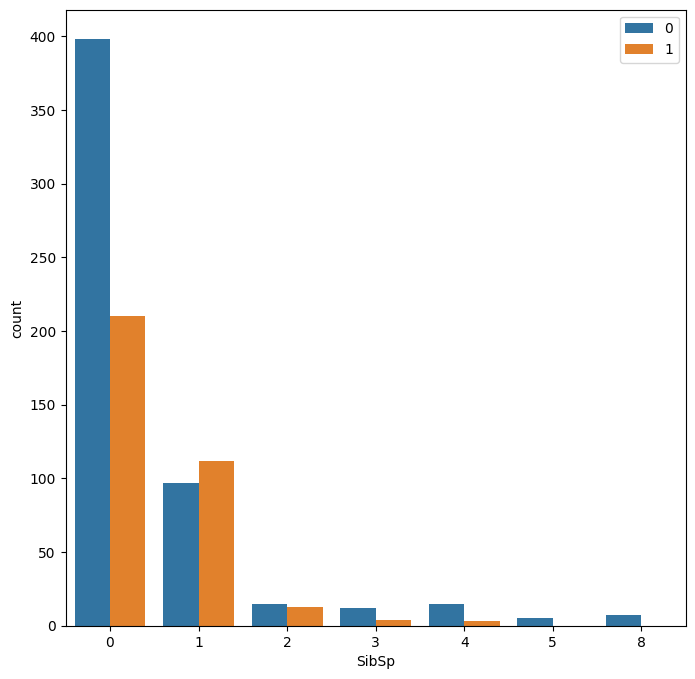

In [936]:
fig, ax = plt.subplots(figsize=(8,8))
 
sns.countplot(data=df, x='SibSp', hue='Survived', ax=ax)
labels=['0', '1']
ax.legend(labels=labels)
 
plt.show()

동승자 숫자 별 생존률을 그래프로 나타내보았다. 이번에는 부모자식의 숫자 별 생존률을 알아보자

In [937]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

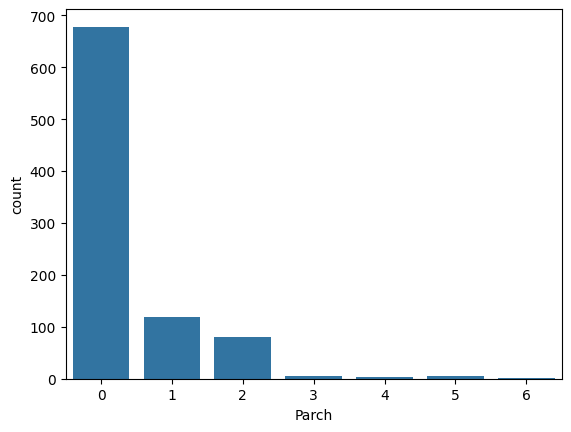

In [938]:
sns.countplot(data=df, x='Parch')

SibSp 칼럼과 비슷하게 Parch 칼럼도 동승자가 없는 승객이 제일 많은 것을 확인 가능하다.

In [939]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


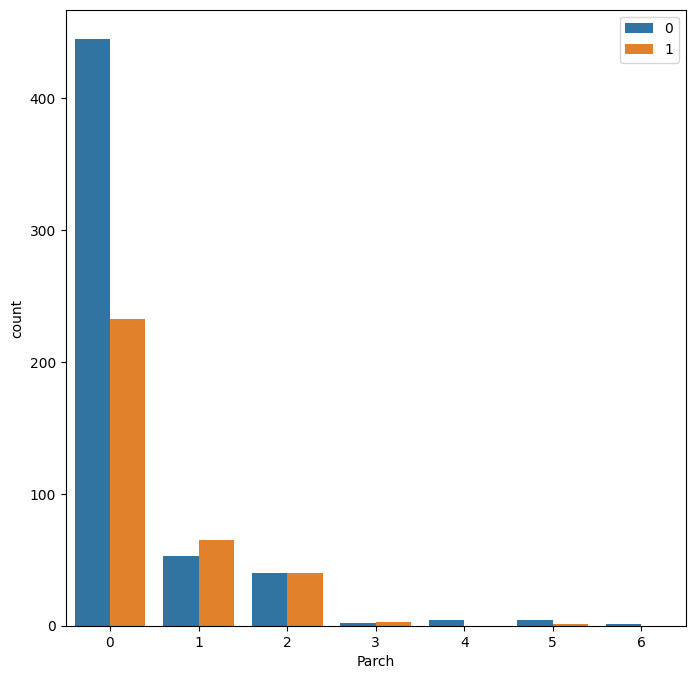

In [940]:
fig, ax = plt.subplots(figsize=(8,8))
 
sns.countplot(data=df, x='Parch', hue='Survived', ax=ax)
labels=['0', '1']
ax.legend(labels=labels)
 
plt.show()

SibSp 칼럼과 비슷한 결과 값이 나오는 것을 볼 수 있다. SibSp칼럼과 Parch칼럼으로는 생존률에 대한 유의미한 통계를 낼 수 없을 것 같다.

### 6. 탑승 항구 별 생존률 통계

우선 탑승 항구 별 탑승 승객 수를 알아보자

<Axes: xlabel='Embarked', ylabel='count'>

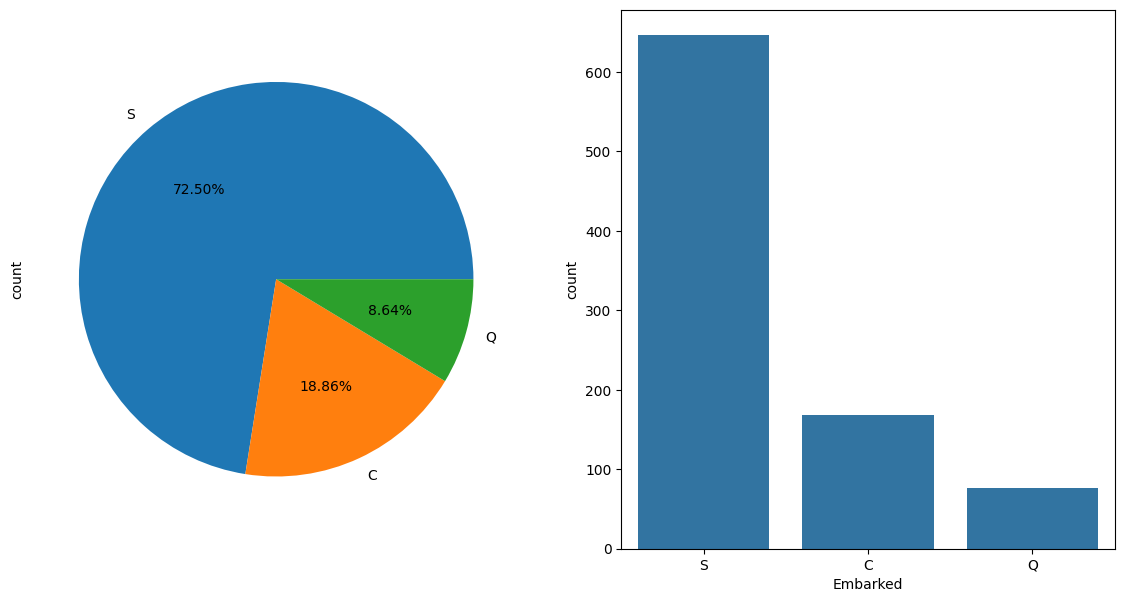

In [941]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Embarked')

사우샘프턴의 탑승승객이 제일 많은 것을 볼 수 있다. 이제 탑승 항구 별 생존 유무에 대해서 알아보자

In [942]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


<Axes: xlabel='Embarked', ylabel='count'>

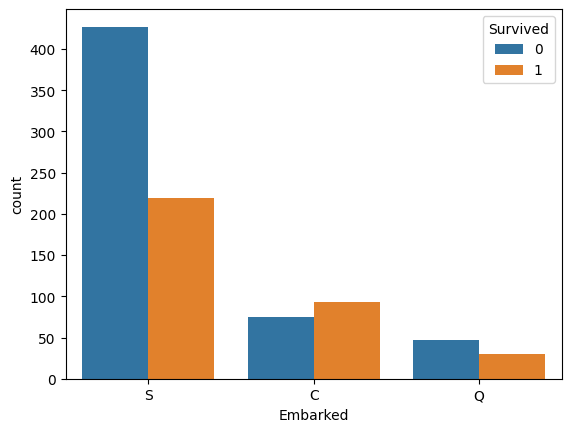

In [943]:
sns.countplot(data=df, x='Embarked', hue='Survived')

사우샘프턴 탑승객의 사망자 수가 많은 것을 확인할 수 있다. 이유를 찾기 위해 항구 별 티켓 클래스와 동승자를 확인했다.

<Axes: >

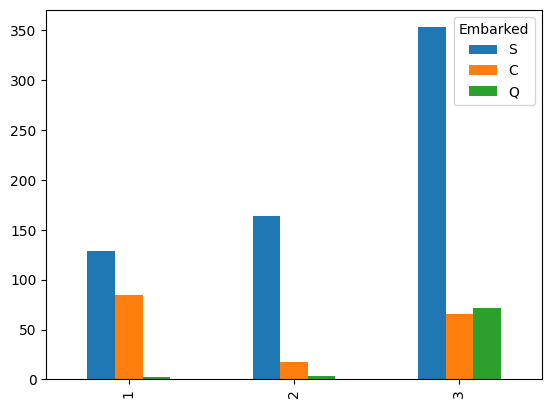

In [944]:
Pc1 = df[df['Pclass'] == 1]['Embarked'].value_counts()
Pc2 = df[df['Pclass'] == 2]['Embarked'].value_counts()
Pc3 = df[df['Pclass'] == 3]['Embarked'].value_counts()

Pcl = pd.DataFrame([Pc1, Pc2, Pc3])
Pcl.index = ['1', '2', '3']

Pcl.plot(kind='bar')

3등석 승객이 사우샘프턴 항구에서 많이 탑승한 것을 이 그래프로 확인할 수 있었다. 위의 티켓 클래스 별 생존자 분포에서 3등석 승객의 사망 비율이 높았던 것과 비교해서 대조 가능하다.

이어서 항구별 탑승객의 동승자 수를 알아보자

<Axes: xlabel='Parch', ylabel='count'>

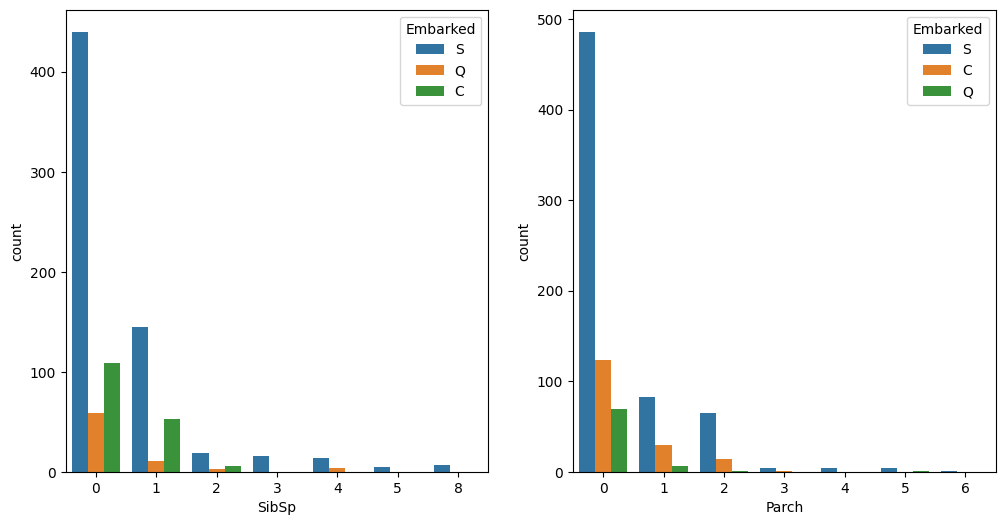

In [945]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='SibSp', hue='Embarked')
plt.subplot(1, 2 ,2)
sns.countplot(data=df, x='Parch', hue='Embarked')

혼자 탑승한 승객은 대부분 사우샘프턴 항구에서 탑승한 것으로 파악된다. 위에서 동승자 없이 탑승한 승객의 사망 비율이 높았던 것이 사우샘프턴 항구 탑승객의 사망 비율이 높은 것과 대조 가능하다.

### 7. 탑승 금액 별 생존 유무

탑승 금액별로 생사 여부를 확인해보자

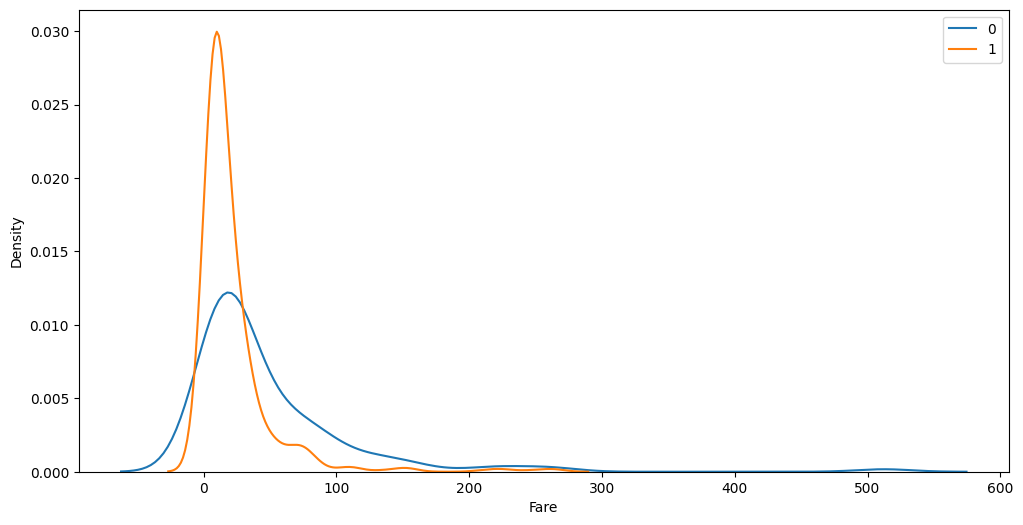

In [946]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df[df['Survived']==1]['Fare'])
sns.kdeplot(df[df['Survived']==0]['Fare'])

ax.legend(['0', '1'])


탑승 금액이 높을 수록 사망자가 적어지는 것을 볼 수 있습니다.

### 8. 추가 분석

지금까지 분석한 내용을 토대로 가장 생존률이 높은 그룹과 가장 생존률이 낮은 그룹을 찾아보자. 고려할 것은 성별, 티켓 클래스, 나이 대로 정했다.

In [947]:
df['Age-Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
grouped = df.groupby(['Sex', 'Pclass', 'Age-Group'])['Survived'].mean().reset_index()

In [948]:
grouped.sort_values(by='Survived', ascending=False)

,Sex,Pclass,Age-Group,Survived
1,female,1,Teenager,1.000000
4,female,1,Senior,1.000000
5,female,2,Child,1.000000
6,female,2,Teenager,1.000000
14,female,3,Senior,1.000000
15,male,1,Child,1.000000
20,male,2,Child,1.000000
2,female,1,Young Adult,0.977778
3,female,1,Adult,0.972222
7,female,2,Young Adult,0.928571


In [949]:
grouped.drop([9], axis=0, inplace=True)



In [950]:
grouped.sort_values(by='Survived', ascending=False)

,Sex,Pclass,Age-Group,Survived
1,female,1,Teenager,1.000000
4,female,1,Senior,1.000000
5,female,2,Child,1.000000
6,female,2,Teenager,1.000000
14,female,3,Senior,1.000000
15,male,1,Child,1.000000
20,male,2,Child,1.000000
2,female,1,Young Adult,0.977778
3,female,1,Adult,0.972222
7,female,2,Young Adult,0.928571


그룹별 생존률 중 결측치가 하나 존재하는 것을 볼 수 있다. 2등석 여성 노인의 생존률을 얻을 수 있는 통계는 너무 적어서 삭제하기로 한다.

그렇게 되면 가장 생존률이 높은 그룹은 1등석 여성 10대, 노인 등 티켓 클래스가 높은 여성 아이들과 노인이고, 생존률이 가장 낮은 그룹은 티켓 클래스가 낮은 남성들인 것을 확인할 수 있다.

### 9. 머신러닝

#### 데이터 전처리

Ticket, Cabin 제거

In [951]:
print("Before", df.shape, test.shape)

df = df.drop(['Ticket'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [df, test]

print("After", df.shape, test.shape)

Before (891, 13) (418, 11)
After (891, 12) (418, 9)


Title칼럼 생성, 정규식과 성별을 합쳐서 범주 확인

In [952]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

print(pd.crosstab(df['Title'], df['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


여자:Miss, Mrs 남자: Master, Mr
나머지: Rare

In [953]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
print(df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [954]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked Age-group    Age-Group  Title  
0      0   7.2500        S        35  Young Adult      1  
1      0  71.2833        C        50        Adult      3  
2      0   7.9250        S        35  Young Adult      2  
3      0  53.1000        S        35  Young Adult      3  
4      0   8.0500        

Name, PassengerID 칼럼 삭제

In [955]:
df = df.drop(['Name', 'PassengerId', 'Age-Group', 'Age-group'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [df, test]


print(df.shape, test.shape)

(891, 9) (418, 9)


성별 변수 0, 1로 변경

In [956]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1


나이를 5개 그룹으로 쪼개서 범주형으로 변경

AgeBand 그룹생성

In [957]:
df['AgeBand'] = pd.cut(df['Age'], 5)
print(df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True))

            AgeBand  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.344168
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


그룹을 칼럼으로 만들어서 삽입

In [958]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
df = df.drop(['AgeBand'], axis=1)
combine = [df, test]
print(df.head())

   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  1.0      1      0   7.2500        S      1
1         1       1    1  2.0      1      0  71.2833        C      3
2         1       3    1  1.0      0      0   7.9250        S      2
3         1       1    1  2.0      1      0  53.1000        S      3
4         0       3    0  2.0      0      0   8.0500        S      1


In [959]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

print(df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(3))

   Age*Class  Age  Pclass
0        3.0  1.0       3
1        2.0  2.0       1
2        3.0  1.0       3


In [960]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
                                                               #자기 자신을 포함시킵니다.
print(df[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


In [961]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print(df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [962]:
df = df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [df, test]

In [963]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
print(df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True))

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [964]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

In [965]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df = df.drop(['FareBand'], axis=1)

In [966]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,0,3,0,1.0,0,S,1,3.0,0
1,1,1,1,2.0,3,C,3,2.0,0
2,1,3,1,1.0,1,S,2,3.0,1
3,1,1,1,2.0,3,S,3,2.0,0
4,0,3,0,2.0,1,S,1,6.0,1


### 모델 학습(랜덤 포레스트)

분류 모델들을 적용

In [967]:
df= pd.get_dummies(df)
test = pd.get_dummies(test)

df_label = df['Survived']
df_data = df.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

레이블과 df, test 데이터를 분리.

In [968]:
df_data, df_label = shuffle(df_data, df_label, random_state = 5)

함수 정의

In [969]:
def df_and_test(model):
    model.fit(df_data, df_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(df_data, df_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

학습

In [970]:
# Random Forest
rf_pred = df_and_test(RandomForestClassifier(n_estimators=100))


Accuracy :  86.98 %


### 9. 타이타닉 데이터 분석을 통해서 알 수 있었던 점

- 여러 가지 조건에 대한 생존률 변화
    - 남성보다 여성의 생존률이 더 높은 점을 알 수 있었다.
    
   
    - 티켓 클래스에 따른 생존률 변화가 있었다. 티켓 클래스의 등급이 낮을수록 생존률이 내려감 이를 통해서 티켓 클래스가 높은 승객의 구조 우선순위가 높다는 점을 알 수 있었다.
    
   
    - 나이가 어린 승객의 경우 생존률이 높은 점을 알 수 있었다. 어린 승객인 경우 구조 우선순위가 높았다는 것을 확인했다.
    
   
    - 동승자에 따른 생존률 변화를 확인했다. 동승자가 없는 승객일수록 생존률이 낮고, 가족이나 형제자매와 함께 탑승한 탑승객은 생존률이 높았다.
    
   
    - 탑승지에 따른 생존률 변화를 확인했다. 사우샘프턴에서의 탑승객의 수가 가장 많았고 그에 따라 사망자 수가 가장 많았다. 
    
    
    - 탑승 금액 별로 생존률의 변화가 있었다. 이것은 티켓 클래스와 같은 맥락으로 금액이 높은 승객일 수록 티켓 클래스가 높으므로 생존률이 높다는 점을 확인했다.

- 위의 조건을 토대로 유추해 낼 수 있는 사실
    - 나이가 어리거나 많고, 여성의 생존률이 높은 것으로 봐서, 사회적 약자들을 우선시해서 구조한 것을 알 수 있다.

    - 티켓 클래스 별로 생존률이 차이가 나는 것으로 봐서, 사회적 불평등을 반영한 것으로 보인다. 3등급 승객들은 대부분 노동자 계층이나 이민자였으며, 구조를 위한 자원 접근이 제한적인것으로 볼 수 있다.

    - 데이터들간의 상관 관계를 확인할 수 있었다. 1등석 여성 승객의 생존률이 가장 높은 편이고, 3등석 남성 승객의 생존률이 가장 낮은 편이다. 또한 사우샘프턴 탑승객들의 사망률이 높은 것에는 탑승객들중 대다수가 3등석 승객이였고, 사우샘프턴에서 동승자가 없는 승객이 가장 많이 탑승했던 것이 이유가 될 수 있다고 본다.